**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

**Creating user-defined function to plot the graph**

In [2]:
def draw(x_axis,y_axis,x_label,y_label,show = True):

    plt.figure(figsize = (15,5))
    plt.grid(alpha = 0.5)
   # plt.style.use('dark_background')
    plt.plot(x_axis, y_axis)
    plt.xlabel(x_label, fontsize = 20)
    plt.ylabel(y_label, fontsize= 20)
    if show:
        plt.show()
    return    

**Plotting individual components of the signal**

***First Component***

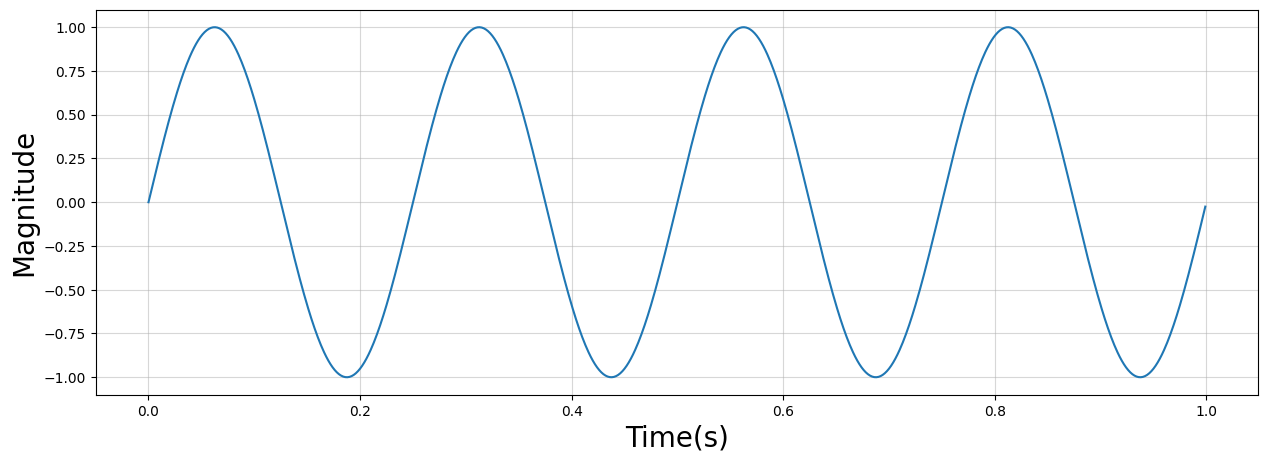

In [3]:
dt  =0.001                                                          #differential of the time 
t = np.arange(0,1,dt)                                               #distributed one second time in 1000 data points

sin_4t = np.sin(2 *  np.pi * 4 * t)                                        # sin signal with  the frequency of 4 hz

draw(x_axis = t,y_axis = sin_4t ,x_label = "Time(s)",y_label = "Magnitude",show = True)

***Second component***

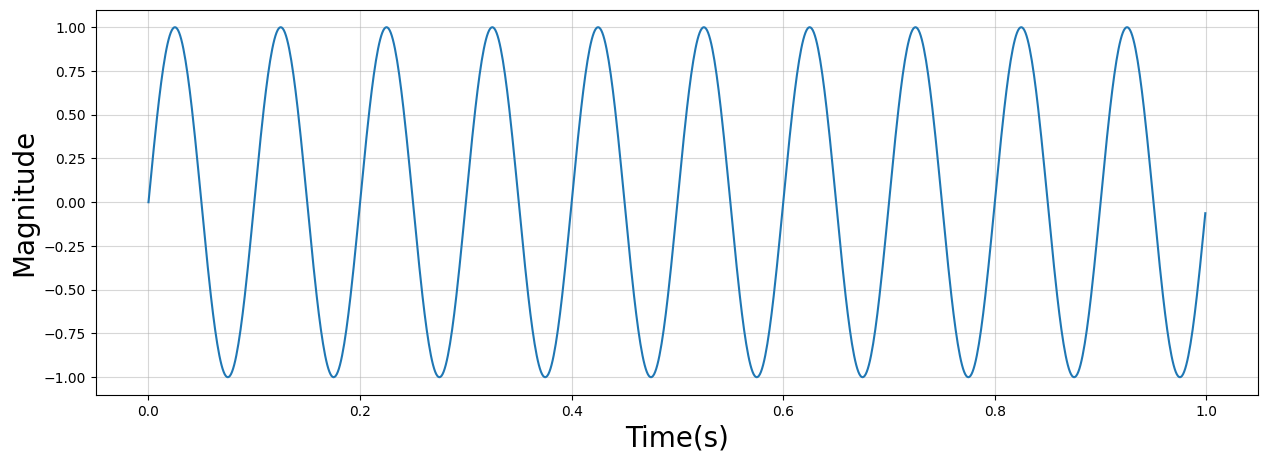

In [4]:
sin_10t = np.sin(2*np.pi*10*t)              #Sin signal with the frequency of 10 hz
                
draw(x_axis = t,y_axis = sin_10t ,x_label = "Time(s)",y_label = "Magnitude",show = True)

***Combined Graph***

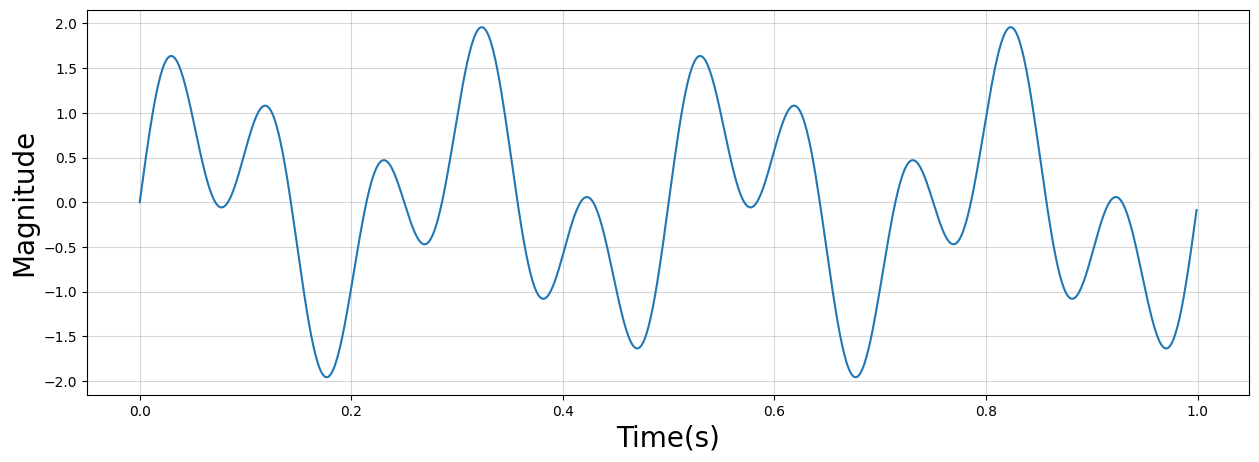

In [5]:
combined = sin_4t + sin_10t   #two signals combined with each other

draw(x_axis = t,y_axis = combined ,x_label = "Time(s)",y_label = "Magnitude",show = True)

**Adding Noise to the combined signal**

***Creating user-defined function to add noise***

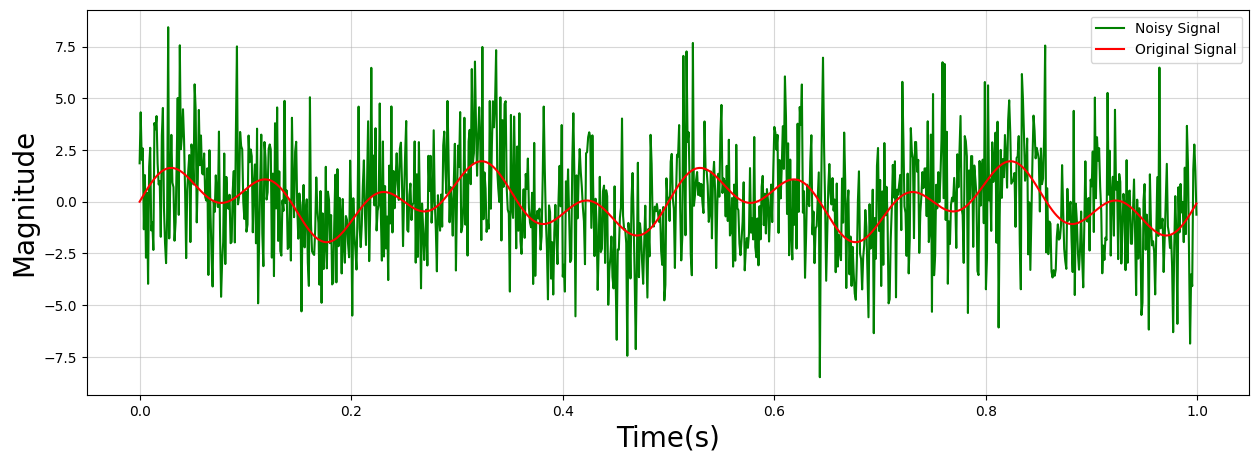

In [6]:
def add_noise(signal , noise_amplitude = 2.5):
  
    noisy = signal + 2.5*np.random.randn(len(t))       
    return noisy 

original = combined
noisy = add_noise(original , 2.5)


plt.figure(figsize = (15,5))
plt.grid(alpha = 0.5)
#plt.style.use('dark_background')
plt.plot(t, noisy,color = "g", label = "Noisy Signal")
plt.plot(t,combined,color = 'r', label = "Original Signal")
plt.xlabel("Time(s)", fontsize = 20)
plt.ylabel("Magnitude", fontsize= 20)
plt.legend()
plt.show()

**Fourier Transformation**

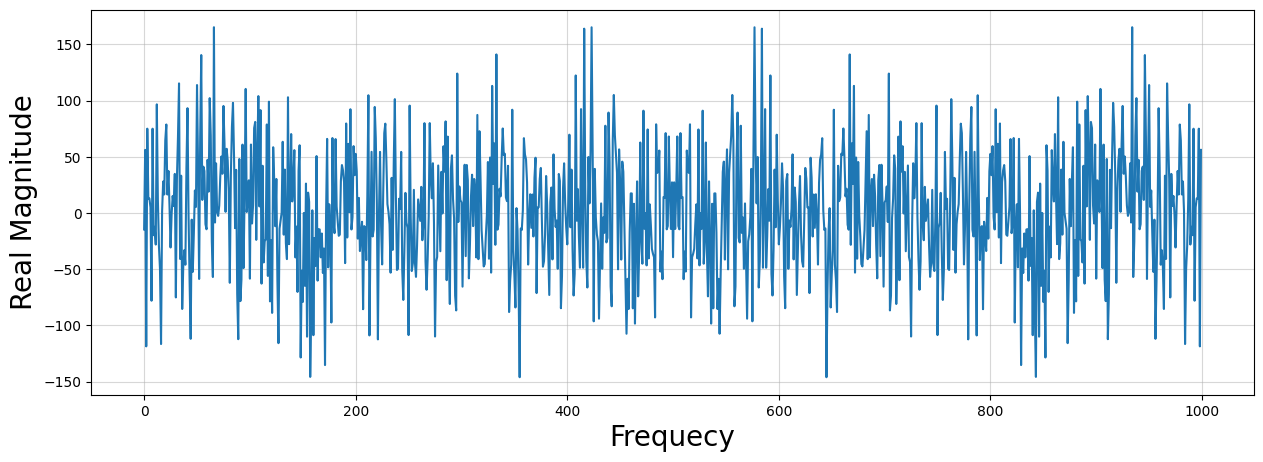

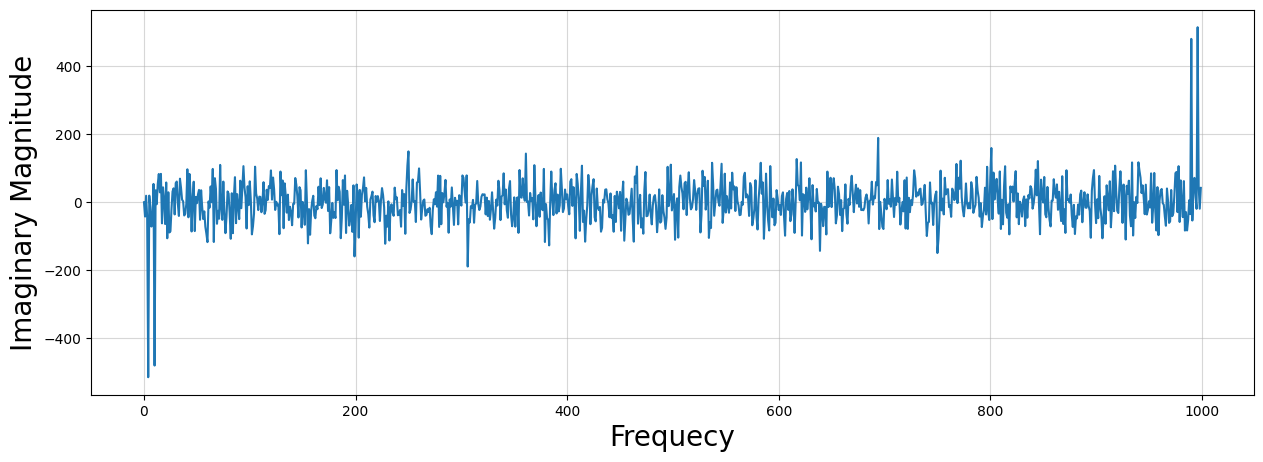

In [7]:
n = len(t)                                                      # number of data points in the dataset
f_transformed = np.fft.fft(noisy,n)                             # transformation done  
f_real = f_transformed.real                                     # real values of fourier transform
f_imag = f_transformed.imag                                     # imaginary values of fourier transform
frequecies = (1/(dt*n)) * (np.arange(n))                        # frequencies in fourier transform

# If you plot the real and imaginary components of the transform then you may get confused so always remember ,we 
# need to go for the power density of different frequecies in transform to get the most prominent frequencies of signal

draw(x_axis = frequecies,y_axis = f_real,x_label = "Frequecy",y_label = "Real Magnitude",show = True)
draw(x_axis = frequecies,y_axis = f_imag,x_label = "Frequecy",y_label = "Imaginary Magnitude",show = True)

**Power Spectral Density**

C:\Users\Bhanu Pratap Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Bhanu Pratap Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


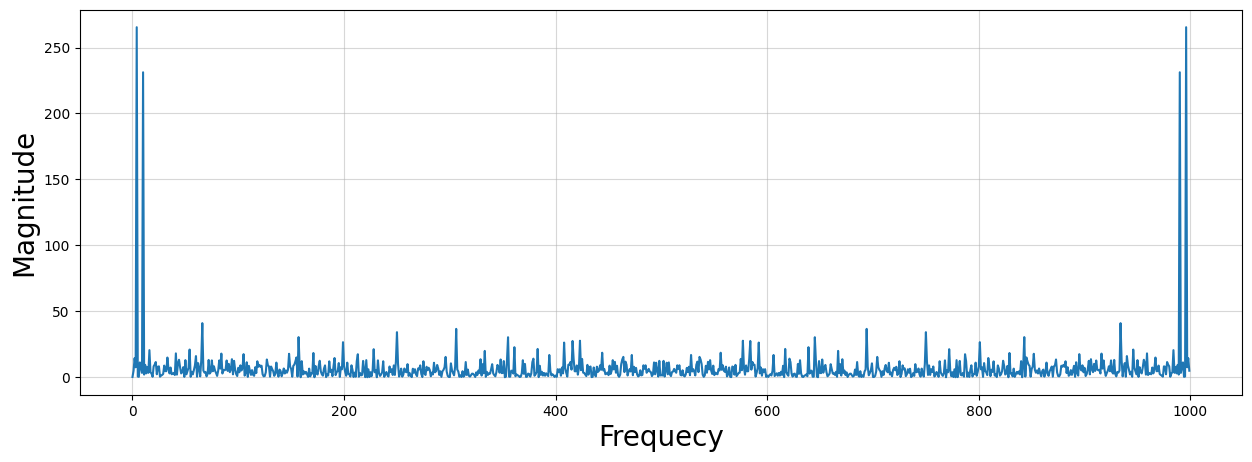

In [8]:
psd = f_transformed * np.conjugate(f_transformed) / n               # formula for power spectral density

draw(x_axis = frequecies,y_axis = psd,x_label = "Frequecy",y_label = "Magnitude",show = True)

In [ ]:
draw(x_axis = frequecies[0:int(len(frequecies)/2)],y_axis = psd[0:int(len(frequecies)/2)],x_label = "Frequecy",y_label = "Magnitude",show = True)

In [13]:
# selecting only prominent frequecies any nullifing all the other indices coefficients in fourier transform

indices = [psd > 50]
print(indices)
f_transformed = f_transformed*indices


# doing inverse fourier transformation of the filtered FT

inversed = np.fft.ifft(f_transformed)


NameError: name 'psd' is not defined

In [11]:
draw(x_axis = t,y_axis = inversed.reshape((1000,)),x_label = "Time(t)",y_label = "Recovered Signal Magnitude",show = True)
draw(x_axis = t,y_axis = mixed ,x_label = "Time(t)",y_label = "Original Signal Magnitude",show = True) 

NameError: name 'inversed' is not defined